In [6]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [7]:
train_data_set = np.load("fashion_train.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [8]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_element = []

for i in range(len(train_data_set)):
    train_element.append(train_data_set[i][784])
      
train_element = np.array(train_element)

In [9]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp

In [10]:
len(cleaned_train_set[0])

784

In [11]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.

cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)

In [12]:
def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()

    cloth_cat = train_element[index_num]
    if cloth_cat == 0:
        print("0: This is a t-shirt/top")
    if cloth_cat == 1:
        print("1: This is a pair of trousers")
    if cloth_cat == 2:
        print("2: This is a pullover")
    if cloth_cat == 3:
        print("3: This is a dress")
    if cloth_cat == 4:
        print("4: This is a shirt")
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''
    
    ze_val = 0
    on_val = 0
    tw_val = 0
    th_val = 0
    fo_val = 0
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

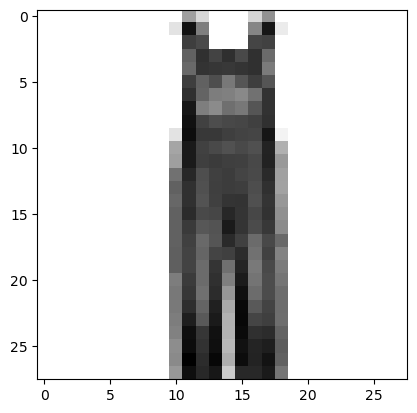

1: This is a pair of trousers
There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [13]:
show_image(2250)

count_categories(train_element)

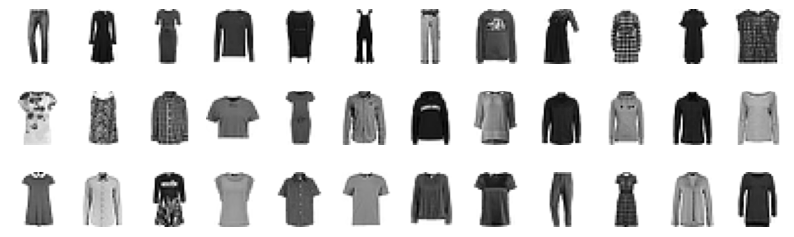

In [14]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the training dataset
train_data_set = np.load("fashion_train.npy")

# Step 1: Extract labels
train_labels = train_data_set[:, -1]  # Extract the last column as labels

# Step 2: Clean the training set by removing the last column
cleaned_train_set = train_data_set[:, :-1]  # Get all but the last column

# Step 3: Reshape the cleaned training set
# The cleaned training set is already in the right shape (n_samples, 784)
# No need to reshape into 28x28 for standardization; it can be done as a 2D array.

# Step 4: Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cleaned_train_set)

# Now `standardized_data` is your standardized training set
print("Standardized data shape:", standardized_data.shape)



Standardized data shape: (10000, 784)


Original data shape: (10000, 784)
Transformed data shape: (10000, 210)
Explained variance ratio: [0.22645698 0.13673557 0.06381166 0.05046707 0.03064291 0.02924805
 0.02197067 0.01880203 0.0147053  0.01416444 0.01298674 0.01232636
 0.01005118 0.00914286 0.00886118 0.00844979 0.00800824 0.0074046
 0.0071842  0.00678097 0.00637763 0.00625898 0.0059261  0.00557587
 0.00524909 0.00501018 0.00489192 0.0047749  0.00451686 0.00424941
 0.00419099 0.00403955 0.00393599 0.00388444 0.00379559 0.00362945
 0.00357774 0.00351894 0.00333661 0.00324689 0.00315796 0.00312242
 0.00298242 0.00291243 0.00277144 0.00273708 0.0026438  0.00258013
 0.00245687 0.00243532 0.002335   0.00228124 0.0022166  0.00216888
 0.00211117 0.00205265 0.0020176  0.00196418 0.0019223  0.00186012
 0.00181671 0.00179017 0.00176835 0.00172591 0.00167618 0.00165702
 0.00162515 0.00159048 0.00158136 0.00152019 0.00149526 0.00147891
 0.00146017 0.00144748 0.00142196 0.00141197 0.00139531 0.00136788
 0.00134884 0.00131927 0.00129775

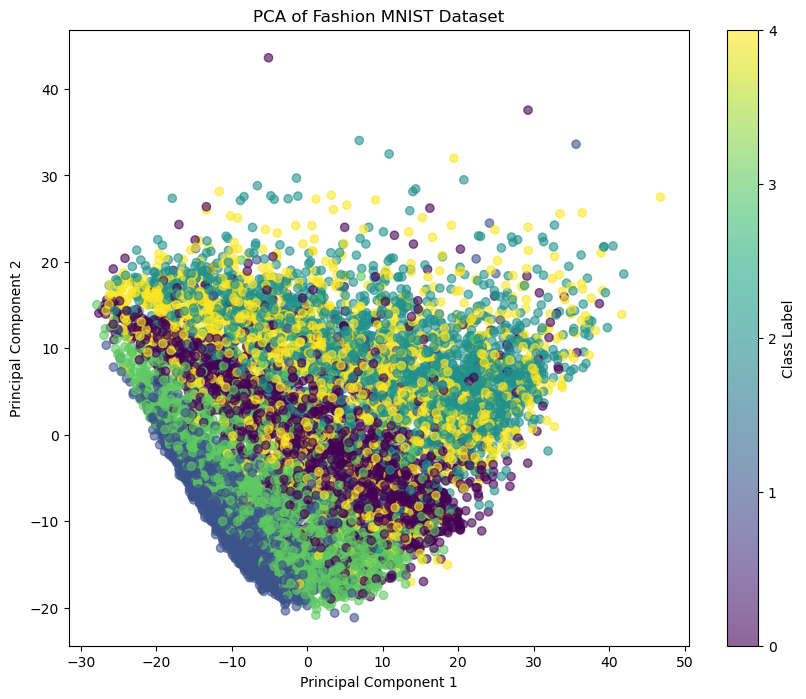

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
train_data_set = np.load("fashion_train.npy")

# Step 2: Extract the labels and clean the data
train_element = np.array([train_data_set[i][784] for i in range(len(train_data_set))])
cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp

# Step 3: Standardize the data
scaler = StandardScaler()
cleaned_train_set_standardized = scaler.fit_transform(cleaned_train_set)

# Step 4: Perform PCA
pca = PCA(n_components=210)  # You can adjust this number if needed
pca_result = pca.fit_transform(cleaned_train_set_standardized)

# Print the shapes and explained variance ratio
print("Original data shape:", cleaned_train_set.shape)
print("Transformed data shape:", pca_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 5: Visualize the first two principal components
pca_2d = pca_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_element, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()
